# **2. Data Preprocessing**

## Import neccessary libraries

In [190]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

Đầu tiên, chúng ta sẽ đọc dữ liệu từ tệp **lichess_games.csv** và hiển thị ngẫu nhiên một vài dòng dữ liệu

In [191]:
lichess_games = "lichess_games.csv"
raw_df = pd.read_csv(lichess_games)
raw_df.sample(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
10333,To69KSX0,True,1.504035e+12,1.504036e+12,21,resign,white,5+5,amayak,2225,hatwally2000a,2096,e4 e5 d4 exd4 c3 dxc3 Bc4 cxb2 Bxb2 d5 Bxd5 Nf...,C21,Danish Gambit Accepted | Schlechter Defense,10
3955,MBfosxws,True,1.480780e+12,1.480780e+12,13,mate,white,15+0,casta73,1180,thepawnsofwrath,1358,e4 e5 Nf3 Nc6 d4 exd4 Nxd4 b6 Bc4 Bb7 Qf3 Nxd4...,C45,Scotch Game,7
3614,CfJNZkkN,True,1.482370e+12,1.482370e+12,99,outoftime,white,10+0,marcelo905,1862,dellinspiron25,1502,e4 d5 exd5 Qxd5 Nc3 Qd8 d4 Nf6 Nf3 Nc6 Bb5 Bd7...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4


## A. Khám phá dữ liệu

## Có bao nhiêu dòng và cột trong bộ dữ liệu

In [192]:
row_num = raw_df.shape[0]
col_num = raw_df.shape[1]
shape = (row_num, col_num)

print(f"Number of rows and columns are: {shape}")

Number of rows and columns are: (20058, 16)


Điều này có nghĩa là trong tập dữ liệu của chúng ta có tổng cộng 20.058 trận đấu, và mỗi trận đấu bao gồm 16 thuộc tính.

## Ý nghĩa của mỗi dòng dữ liệu

In [193]:
raw_df.sample(1)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
8881,1G1hMvgb,True,1.494460e+12,1.494460e+12,68,mate,black,10+0,giigii,1000,kwespy,999,e4 e5 Nf3 Nf6 c3 Bc5 d4 Bb6 Nxe5 Nxe4 Bc4 O-O ...,C42,Petrov's Defense,4


Each row represents one complete game, providing details about the players, the result, the moves played, and the opening used. This allows for an analysis of individual game outcomes, player performance, and strategies.

## Có những dòng nào bị trùng lặp không ?


In [194]:
raw_df["id"].value_counts().sort_values(ascending=False) 

id
XRuQPSzH    5
igSDFKv0    4
edYOVb5F    4
GstYv2mJ    4
CvakmVNb    4
           ..
ZT8bSrQX    1
Euox72jN    1
CxVMX1g4    1
zHPPTUB1    1
N8G2JHGG    1
Name: count, Length: 19113, dtype: int64

Qua dữ liệu trên, chúng ta sẽ xóa các hàng bị trùng lặp.

In [195]:
raw_df.drop_duplicates("id",keep="first",inplace=True)

In [196]:
num_duplicated_rows = raw_df.duplicated().sum()
if num_duplicated_rows == 0:
    print(f"No duplicated row")
else:
    print(f"Duplicated rows: {num_duplicated_rows}")

No duplicated row


## Ý nghĩa của mỗi cột dữ liệu là gì ?

Trong tập dữ liệu của chúng ta, ý nghĩa của từng cột như sau:

1. **id**: Mã định danh duy nhất cho trận đấu.
2. **rated**: Trận đấu có được xếp hạng hay không (TRUE hoặc FALSE).
3. **created_at**: Thời gian tạo trận đấu, có khả năng ở định dạng thời gian Unix (mili-giây).
4. **last_move_at**: Thời gian thực hiện nước đi cuối cùng, cũng có khả năng ở định dạng thời gian Unix.
5. **turns**: Số lượt đi (nước đi) trong trận đấu.
6. **victory_status**: Kết quả của trận đấu (ví dụ: "outoftime", "resign", "mate" cho chiếu hết).
7. **winner**: Người thắng trận đấu ("white" hoặc "black").
8. **increment_code**: Quy tắc thời gian được sử dụng trong trận đấu (ví dụ: "15+2" nghĩa là 15 phút cộng 2 giây mỗi nước đi).
9. **white_id**: ID của người chơi cầm quân trắng.
10. **white_rating**: Xếp hạng của người chơi quân trắng tại thời điểm trận đấu.
11. **black_id**: ID của người chơi cầm quân đen.
12. **black_rating**: Xếp hạng của người chơi quân đen tại thời điểm trận đấu.
13. **moves**: Chuỗi các nước đi được thực hiện trong trận đấu.
14. **opening_eco**: bước đầu tiên của khai cuộc được sử dụng.
15. **opening_name**: Tên của khai cuộc được chơi.
16. **opening_ply**: Số lượt đi (half-moves) trong giai đoạn khai cuộc của trận đấu.

In [197]:
raw_df.describe(include='all')

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
count,19113,19113,1.911300e+04,1.911300e+04,19113.000000,19113,19113,19113,19113,19113.000000,19113,19113.000000,19113,19113,19113,19113.000000
unique,19113,2,NaN,NaN,NaN,4,3,400,9438,NaN,9331,NaN,18920,365,1477,NaN
top,TZJHLljE,True,NaN,NaN,NaN,resign,white,10+0,ssf7,NaN,docboss,NaN,e4 e5,A00,Sicilian Defense,NaN
freq,1,15467,NaN,NaN,NaN,10695,9545,7356,48,NaN,44,NaN,26,948,349,NaN
mean,NaN,NaN,1.483413e+12,1.483414e+12,60.513839,NaN,NaN,NaN,NaN,1597.300005,NaN,1590.045519,NaN,NaN,NaN,4.815780
std,NaN,NaN,2.833975e+10,2.833964e+10,33.488264,NaN,NaN,NaN,NaN,290.022740,NaN,290.441694,NaN,NaN,NaN,2.798283
min,NaN,NaN,1.376772e+12,1.376772e+12,1.000000,NaN,NaN,NaN,NaN,784.000000,NaN,789.000000,NaN,NaN,NaN,1.000000
25%,NaN,NaN,1.476910e+12,1.476912e+12,37.000000,NaN,NaN,NaN,NaN,1401.000000,NaN,1394.000000,NaN,NaN,NaN,3.000000
50%,NaN,NaN,1.495670e+12,1.495670e+12,55.000000,NaN,NaN,NaN,NaN,1567.000000,NaN,1563.000000,NaN,NaN,NaN,4.000000
75%,NaN,NaN,1.503080e+12,1.503080e+12,79.000000,NaN,NaN,NaN,NaN,1792.000000,NaN,1785.000000,NaN,NaN,NaN,6.000000


Hơn nữa, chúng ta có thể thấy rằng có các giá trị **id** bị trùng lặp. Vì **id** là mã định danh duy nhất cho mỗi trận đấu, nên những hàng có cùng **id** được xem là các trận đấu bị trùng lặp.

In [198]:
print(f"Nums of total id: {raw_df['id'].count()}")
print(f"Nums of distinct id: {raw_df['id'].nunique()}")

Nums of total id: 19113
Nums of distinct id: 19113


In [199]:
raw_df.drop_duplicates("id",keep="first",inplace=True)

In [200]:
raw_df.describe(include='all')

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
count,19113,19113,1.911300e+04,1.911300e+04,19113.000000,19113,19113,19113,19113,19113.000000,19113,19113.000000,19113,19113,19113,19113.000000
unique,19113,2,NaN,NaN,NaN,4,3,400,9438,NaN,9331,NaN,18920,365,1477,NaN
top,TZJHLljE,True,NaN,NaN,NaN,resign,white,10+0,ssf7,NaN,docboss,NaN,e4 e5,A00,Sicilian Defense,NaN
freq,1,15467,NaN,NaN,NaN,10695,9545,7356,48,NaN,44,NaN,26,948,349,NaN
mean,NaN,NaN,1.483413e+12,1.483414e+12,60.513839,NaN,NaN,NaN,NaN,1597.300005,NaN,1590.045519,NaN,NaN,NaN,4.815780
std,NaN,NaN,2.833975e+10,2.833964e+10,33.488264,NaN,NaN,NaN,NaN,290.022740,NaN,290.441694,NaN,NaN,NaN,2.798283
min,NaN,NaN,1.376772e+12,1.376772e+12,1.000000,NaN,NaN,NaN,NaN,784.000000,NaN,789.000000,NaN,NaN,NaN,1.000000
25%,NaN,NaN,1.476910e+12,1.476912e+12,37.000000,NaN,NaN,NaN,NaN,1401.000000,NaN,1394.000000,NaN,NaN,NaN,3.000000
50%,NaN,NaN,1.495670e+12,1.495670e+12,55.000000,NaN,NaN,NaN,NaN,1567.000000,NaN,1563.000000,NaN,NaN,NaN,4.000000
75%,NaN,NaN,1.503080e+12,1.503080e+12,79.000000,NaN,NaN,NaN,NaN,1792.000000,NaN,1785.000000,NaN,NaN,NaN,6.000000


## Kiểu dữ liệu hiện tại của mỗi cột là gì? Có cột nào có kiểu dữ liệu không phù hợp không?

### Kiểu dữ liệu của mỗi đặc trưng

In [201]:
get_dtypes = raw_df.dtypes
get_dtypes

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object

Có vẻ như không có kiểu dữ liệu không phù hợp trong các đặc trưng của tập dữ liệu.

## Các giá trị của các cột là dữ liệu số phân phối như thế nào?


Đầu tiên, ta sẽ xem qua các chỉ số thống kê như tỷ lệ giá trị thiếu, min, Q1, trung vị, Q3, và max cho từng cột số trong dữ liệu.

In [202]:
numeric_cols_df = raw_df.select_dtypes(include=['number'])

def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)

def median(df):
    return (df.quantile(0.5)).round(1)

def lower_quartile(df):
    return (df.quantile(0.25)).round(1)

def upper_quartile(df):
    return (df.quantile(0.75)).round(1)

info_df = numeric_cols_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
info_df

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
missing_ratio,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
min,1.376772e+12,1.376772e+12,1.0,784.0,789.0,1.0
lower_quartile,1.476910e+12,1.476912e+12,37.0,1401.0,1394.0,3.0
median,1.495670e+12,1.495670e+12,55.0,1567.0,1563.0,4.0
upper_quartile,1.503080e+12,1.503080e+12,79.0,1792.0,1785.0,6.0
max,1.504493e+12,1.504494e+12,349.0,2700.0,2723.0,28.0


Những thuộc tính dạng số đều không có gì bất thường

### Phân phối của các dữ liệu số

Average Rating of White is: 1597.300005232041
Average Rating of Black is: 1590.045518756867
Average Turns is: 60.513838748495786
Average Opening Ply is: 4.815779835713912
Average created_at is: 1483413101319.3103
Average last_move_at is: 1483413974773.3328


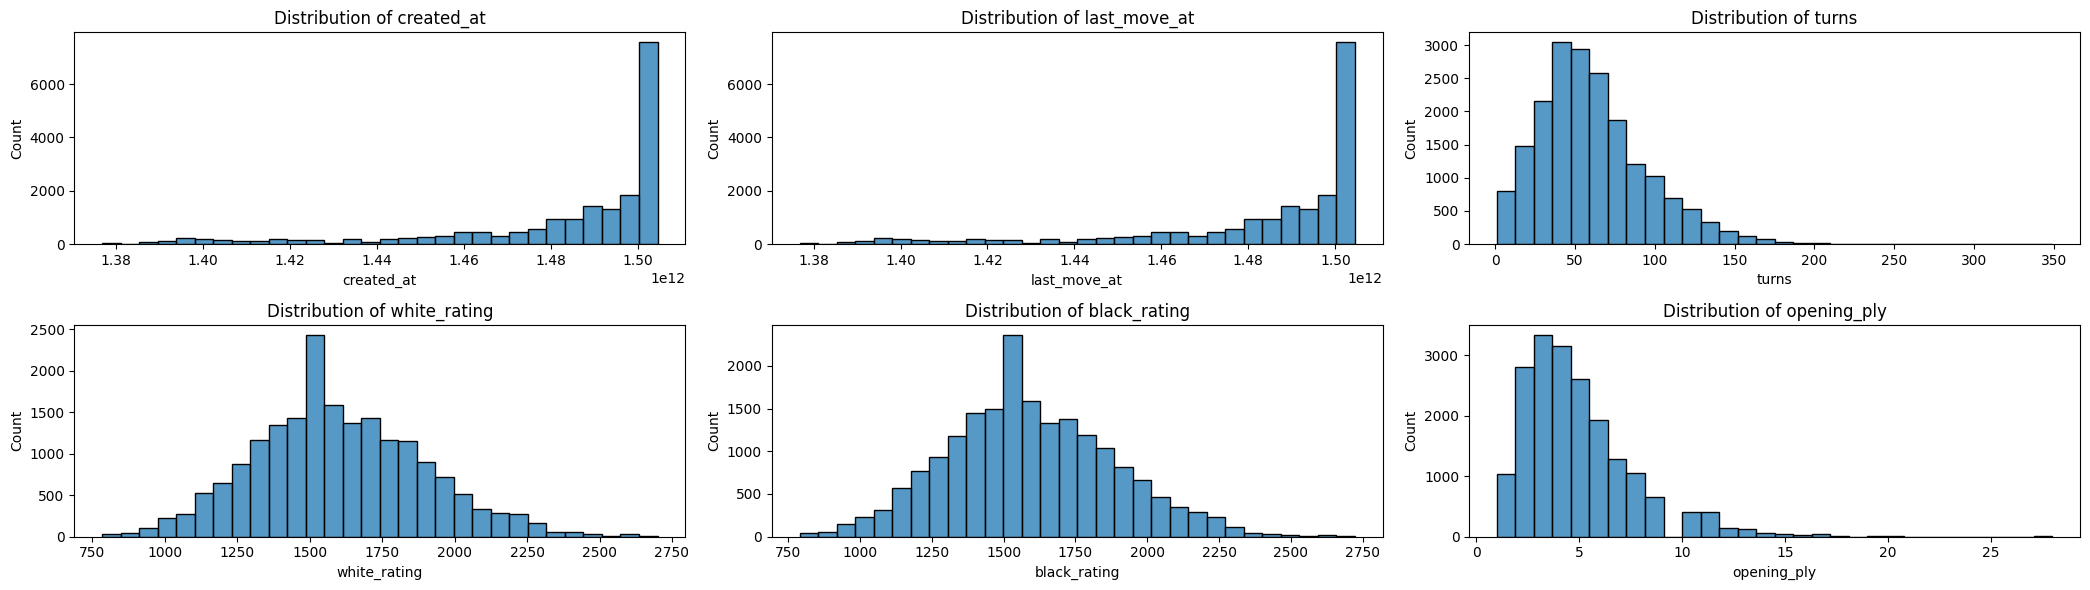

In [203]:
a4_dims = (21, 6)

# Create subplots: 2 rows, 3 columns
fig, ax = plt.subplots(2, 3, figsize=a4_dims)

# Flatten axes for easier indexing
ax = ax.flatten()

sns.histplot(raw_df['created_at'], bins=30, ax=ax[0])
sns.histplot(raw_df['last_move_at'], bins=30, ax=ax[1])
sns.histplot(raw_df['turns'], bins=30, ax=ax[2])
sns.histplot(raw_df['white_rating'], bins=30, ax=ax[3])
sns.histplot(raw_df['black_rating'], bins=30, ax=ax[4])
sns.histplot(raw_df['opening_ply'], bins=30, ax=ax[5])

# Set titles for each subplot
ax[0].set(title="Distribution of created_at")
ax[1].set(title="Distribution of last_move_at")
ax[2].set(title="Distribution of turns")
ax[3].set(title="Distribution of white_rating")
ax[4].set(title="Distribution of black_rating")
ax[5].set(title="Distribution of opening_ply")

# Print average values
print('Average Rating of White is:', raw_df['white_rating'].mean())
print('Average Rating of Black is:', raw_df['black_rating'].mean())
print('Average Turns is:', raw_df['turns'].mean())
print('Average Opening Ply is:', raw_df['opening_ply'].mean())
print('Average created_at is:', raw_df['created_at'].mean())
print('Average last_move_at is:', raw_df['last_move_at'].mean())

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

Như có thể thấy từ các biểu đồ, giá trị của **created_at** và **last_move_at** là bất thường vì chúng gần như giống nhau hoàn toàn.

Chúng ta cũng nhận thấy rằng trong khi **white_rating** và **black_rating** có phân phối **chuẩn** (đối xứng), thì phân phối của **created_at** và **last_move_at** lại **méo trái** (skewed trái). Hơn nữa, phân phối của **turns** và **opening_ply** lại **méo phải** (skewed phải).

Thêm vào đó, ý nghĩa của **created_at** là dư thừa.  
Vì vậy, chúng ta sẽ xóa hai cột này.

In [204]:
raw_df.drop(["created_at","last_move_at"],axis=1,inplace=True) 


In [205]:
raw_df.sample(1)

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
8684,zxNAe2Vz,True,95,resign,black,5+20,nederlander2,1450,denkiev,1532,d4 e6 Bf4 c6 e3 h5 c4 g5 Bg3 h4 Be5 f6 Bxb8 Rx...,A40,Horwitz Defense,2


## Các giá trị trong mỗi cột phân loại phân phối như thế nào?


In [206]:
def value_ratios(s):
    total_count = s.notna().sum()
    ratios = (s.value_counts(dropna=True) / total_count * 100).round(1)
    return ratios.to_dict()

def num_values(s):
    return s.value_counts().count()

object_cols = raw_df.select_dtypes(include='object')
object_cols = object_cols.agg([missing_ratio, num_values, value_ratios])
object_cols

,id,victory_status,winner,increment_code,white_id,black_id,moves,opening_eco,opening_name
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,19113,4,3,400,9438,9331,18920,365,1477
value_ratios,"{'TZJHLljE': 0.0, 'ojkMBE49': 0.0, 'JTfFY9HD':...","{'resign': 56.0, 'mate': 31.3, 'outoftime': 8....","{'white': 49.9, 'black': 45.4, 'draw': 4.6}","{'10+0': 38.5, '15+0': 6.6, '15+15': 4.3, '5+5...","{'ssf7': 0.3, 'bleda': 0.3, 'hassan1365416': 0...","{'docboss': 0.2, 'cape217': 0.2, 'amanan': 0.2...","{'e4 e5': 0.1, 'e4 d5': 0.1, 'd4 d5': 0.1, 'e4...","{'A00': 5.0, 'C00': 4.2, 'D00': 3.7, 'B01': 3....","{'Sicilian Defense': 1.8, 'Van't Kruijs Openin..."


Chúng ta có thể nhận thấy rằng các cột **id**, **move**, **white_id**, **black_id** là dư thừa vì chúng không mang nhiều ý nghĩa trong bài toán mà chúng ta đã đặt ra ban đầu. Do đó, chúng ta sẽ xóa những cột này.

In [207]:
raw_df.drop(["id","moves", "white_id", "black_id"],axis=1,inplace=True) 

In [208]:
raw_df

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply
0,False,13,outoftime,white,15+2,1500,1191,D10,Slav Defense: Exchange Variation,5
1,True,16,resign,black,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,61,mate,white,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,61,mate,white,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,95,mate,white,30+3,1523,1469,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...
20053,True,24,resign,white,10+10,1691,1220,A80,Dutch Defense,2
20054,True,82,mate,black,10+0,1233,1196,A41,Queen's Pawn,2
20055,True,35,mate,white,10+0,1219,1286,D00,Queen's Pawn Game: Mason Attack,3
20056,True,109,resign,white,10+0,1360,1227,B07,Pirc Defense,4


Ngoài ra, các giá trị trong cột opening_name có thể trùng nhau vì sử dụng một khai cuộc nhưng lại khác biến thể. Vì vậy, ta cũng sẽ chuyển đổi chúng về dạng base opening

In [209]:
raw_df['opening_name'] = raw_df['opening_name'].apply(lambda x: x.split(':')[0] if ':' in x else x)

### Phân phối của victory status:

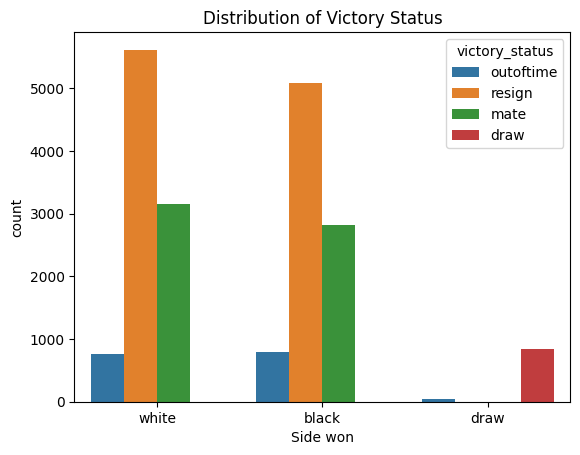

In [210]:
ax = sns.countplot( x = 'winner', hue = 'victory_status', data = raw_df)
ax_attr = ax.set(xlabel = 'Side won', title = 'Distribution of Victory Status')

### Phân phối của openings played:


C:\Users\ACER\AppData\Local\Temp\ipykernel_19768\3929847374.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_attr = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


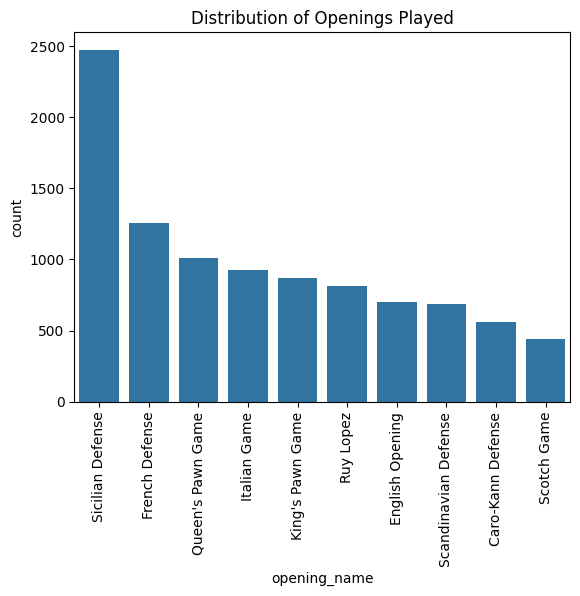

In [211]:
opening_dist = raw_df['opening_name'].value_counts()

chart = sns.barplot( x = opening_dist.index[:10], y = opening_dist[:10])
ax_attr = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
ax_attr = chart.set(title = "Distribution of Openings Played")

### Phân phối của opening_eco:

opening_eco
A00    948
C00    810
D00    701
B01    688
C41    650
      ... 
C32      1
A67      1
E18      1
D95      1
D19      1
Name: count, Length: 365, dtype: int64


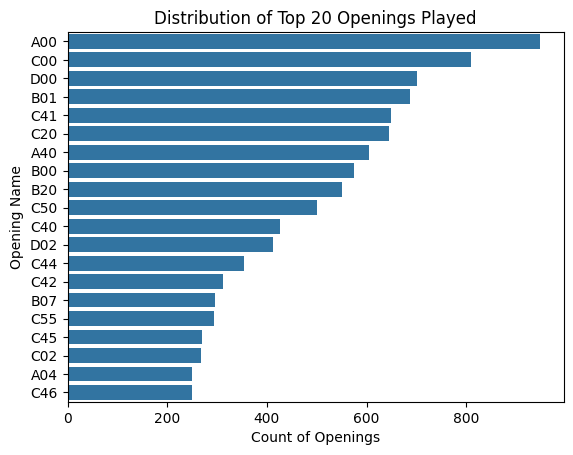

In [212]:
opening_dist = raw_df['opening_eco'].value_counts()
print(opening_dist)
chart = sns.barplot(y=opening_dist.index[:20], x=opening_dist[:20])

ax_attr = chart.set_xlabel('Count of Openings')
ax_attr = chart.set_ylabel('Opening Name')
ax_attr = chart.set(title="Distribution of Top 20 Openings Played")

### Phân phối của increment_code

Text(0.5, 1.0, 'Top 10 most common increment_code')

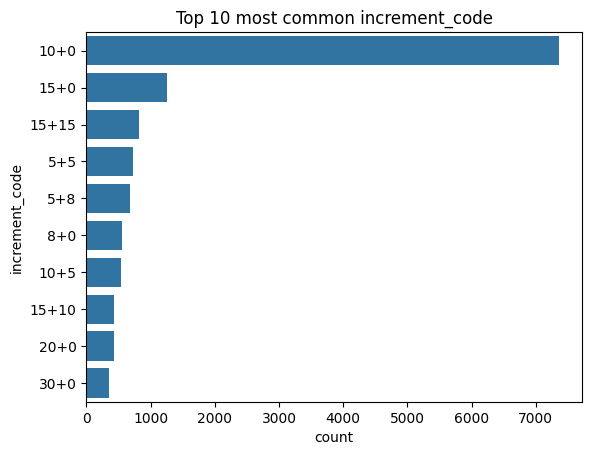

In [213]:
incre_code_counts = raw_df['increment_code'].value_counts()
sns.barplot(x = incre_code_counts[:10], y = incre_code_counts[:10].index)
plt.title('Top 10 most common increment_code')

## Giảm dữ liệu & Tích hợp dữ liệu

Trong phần này, chúng ta sẽ đi sâu vào dữ liệu của mình. Để tiếp tục phân tích chi tiết hơn, chúng ta sẽ tạo thêm các tính năng và thông tin dựa trên các cột hiện có.

Đặc trưng **game_category** được đơn giản hóa thành ba loại: **rapid**, **bullet**, và **blitz**, dựa trên giá trị của **increment_code**. Điều này giúp giảm độ phức tạp và làm dữ liệu dễ dàng hơn trong việc phân tích.

Ban đầu, **game_category** được mã hóa dưới dạng các giá trị số:

- Các trận đấu có **increment_code** từ 10 trở lên sẽ được gán nhãn là **'rapid'**.
- Các trận đấu có **increment_code** dưới 3 sẽ được gán nhãn là **'bullet'**.
- Các trận đấu có **increment_code** từ 3 đến 10 sẽ được gán nhãn là **'blitz'**.

In [214]:
raw_df['game_category'] = raw_df['increment_code'].str.split('+').str[0]

raw_df['game_category'] = raw_df['game_category'].astype(int)

#This approach is more like a short-cut and not a very generalized approach. This will be fixed soon.
raw_df['game_category'][raw_df['game_category'] >= 10] = 11
raw_df['game_category'][raw_df['game_category'] < 3] = 2
raw_df['game_category'][(raw_df['game_category'] >= 3) & (raw_df['game_category'] < 10)] = 5

raw_df['game_category'].replace(11, 'rapid', inplace = True)
raw_df['game_category'].replace(2, 'bullet', inplace = True)
raw_df['game_category'].replace(5, 'blitz', inplace = True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_19768\1151165773.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  raw_df['game_category'][raw_df['game_category'] >= 10] = 11
C:\Users\ACER\AppData\Local\Temp\ipykernel_19768\1151165773.py:6: Set

In [215]:
raw_df

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply,game_category
0,False,13,outoftime,white,15+2,1500,1191,D10,Slav Defense,5,rapid
1,True,16,resign,black,5+10,1322,1261,B00,Nimzowitsch Defense,4,blitz
2,True,61,mate,white,5+10,1496,1500,C20,King's Pawn Game,3,blitz
3,True,61,mate,white,20+0,1439,1454,D02,Queen's Pawn Game,3,rapid
4,True,95,mate,white,30+3,1523,1469,C41,Philidor Defense,5,rapid
...,...,...,...,...,...,...,...,...,...,...,...
20053,True,24,resign,white,10+10,1691,1220,A80,Dutch Defense,2,rapid
20054,True,82,mate,black,10+0,1233,1196,A41,Queen's Pawn,2,rapid
20055,True,35,mate,white,10+0,1219,1286,D00,Queen's Pawn Game,3,rapid
20056,True,109,resign,white,10+0,1360,1227,B07,Pirc Defense,4,rapid


Các giá trị trong cột **game_category** phân bố như thế nào?

In [216]:
raw_df['game_category'].value_counts()

game_category
rapid     15213
blitz      3777
bullet      123
Name: count, dtype: int64

C:\Users\ACER\AppData\Local\Temp\ipykernel_19768\652619348.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_attr = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


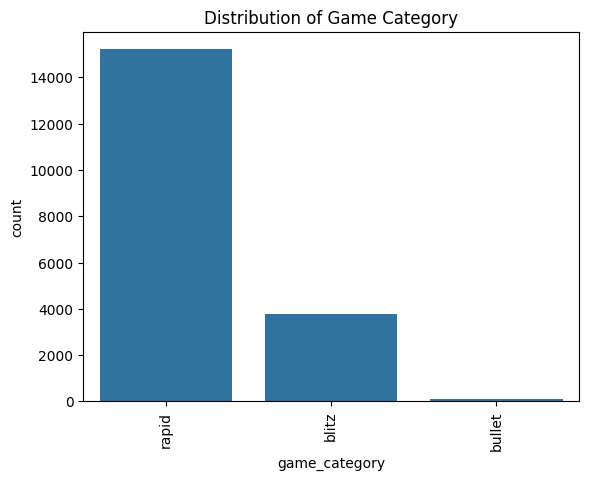

In [217]:
game_cat = raw_df['game_category'].value_counts()

#plotting the top 30 opening played
#opening_dist[:30].plot.bar()

#sns.countplot(games['opening_name'])
chart = sns.barplot( x = game_cat.index[:10], y = game_cat[:10])
ax_attr = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
ax_attr = chart.set(title = "Distribution of Game Category")

Chúng ta sẽ tạo một thuộc tính mới dựa trên Rating của người chơi. Theo quy định của Lichess, khả năng của người chơi được chia thành 6 cấp độ từ thấp đến cao:

- **Rookie**: Dành cho những người chơi có rating <= 1100, đây là những người mới bắt đầu chơi cờ.
- **Beginner**: Dành cho người chơi có rating từ 1100 đến 1600, đại diện cho những người chơi có kinh nghiệm cơ bản.
- **Intermediate**: Dành cho người chơi có rating từ 1600 đến 2000, đại diện cho những người chơi có kỹ năng ổn định.
- **Advanced**: Dành cho người chơi có rating từ 2000 đến 2300, đại diện cho những người chơi có khả năng khá cao.
- **Expert**: Dành cho người chơi có rating từ 2300 đến 3000, đại diện cho những người chơi có kỹ năng xuất sắc.
- **GrandMaster**: Dành cho người chơi có rating trên 3000, đại diện cho những bậc thầy trong môn cờ.

In [218]:
rating_levels = []

def assign_level(player_rating):
    level = ""
    if player_rating <= 1100:
        level = "Rookie"
    elif 1100 < player_rating <= 1600:
        level = "Beginner"
    elif 1600 < player_rating <= 2000:
        level = "Intermediate"
    elif 2000 < player_rating <= 2300:
        level = "Advanced"
    elif 2300 < player_rating <= 2600:
        level = "Expert"
    elif player_rating > 2600:
        level = "GrandMaster"
    
    rating_levels.append(level)


Ngoài ra, chúng ta sẽ làm giàu bộ dữ liệu để trả lời cho các câu hỏi của mình bằng cách phân loại người chơi dựa trên rating của họ.

In [219]:
raw_df["white_rating"].map(assign_level) 
raw_df["white level"]=rating_levels

rating_levels=[]    

raw_df["black_rating"].map(assign_level)
raw_df["black level"]= rating_levels

In [220]:
raw_df.head(5)

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply,game_category,white level,black level
0,False,13,outoftime,white,15+2,1500,1191,D10,Slav Defense,5,rapid,Beginner,Beginner
1,True,16,resign,black,5+10,1322,1261,B00,Nimzowitsch Defense,4,blitz,Beginner,Beginner
2,True,61,mate,white,5+10,1496,1500,C20,King's Pawn Game,3,blitz,Beginner,Beginner
3,True,61,mate,white,20+0,1439,1454,D02,Queen's Pawn Game,3,rapid,Beginner,Beginner
4,True,95,mate,white,30+3,1523,1469,C41,Philidor Defense,5,rapid,Beginner,Beginner


Một trận đấu được coi là chất lượng cao nếu sự chênh lệch rating không quá lớn, vì sự chênh lệch nhỏ thường chỉ ra một trận đấu cân bằng và có tính cạnh tranh cao hơn. Dưới đây là các sự khác biệt được đề xuất:

1. **Sự chênh lệch rating <= 200**: Trận đấu này có sự chênh lệch rating thấp, cho thấy trận đấu khá cân bằng và có thể được coi là chất lượng cao.
2. **200 < Sự chênh lệch rating <= 400**: Trận đấu này có sự chênh lệch rating vừa phải, cho thấy trận đấu ít cân bằng hơn nhưng vẫn có tính cạnh tranh. Nó có thể được coi là chất lượng trung bình.
3. **Sự chênh lệch rating > 400**: Trận đấu này có sự chênh lệch rating lớn, cho thấy sự mất cân bằng trong trận đấu. Nó thường được coi là chất lượng thấp vì trận đấu khó có tính cạnh tranh.

In [221]:
def quality_rating(rating_diff):
    if rating_diff <= 200:
        return "High Quality"  
    elif 200 < rating_diff <= 400:
        return "Medium Quality"  
    else:
        return "Low Quality"  
    
raw_df["Rating_Diff"] = abs(raw_df['white_rating'] - raw_df['black_rating'])
raw_df["Quality"] = raw_df["Rating_Diff"].apply(quality_rating)

### Phân phối sự liên hệ của Rating Difference và Match Quality

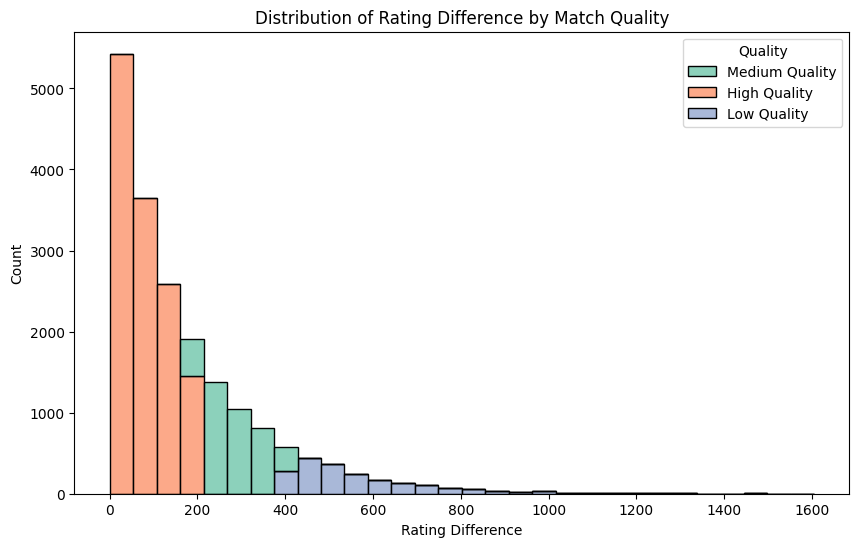

In [222]:
plt.figure(figsize=(10, 6))
sns.histplot(data=raw_df, x="Rating_Diff", hue="Quality", multiple="stack", bins=30, palette="Set2")

plt.title("Distribution of Rating Difference by Match Quality")
plt.xlabel("Rating Difference")
plt.ylabel("Count")
plt.show()

Trong bước này, chúng ta sẽ tạo một đặc trưng mới gọi là **winner condition**, đánh giá liệu người chiến thắng có rating thấp hơn hay cao hơn so với đối thủ. Điều này cung cấp cái nhìn về việc liệu người chiến thắng có thể đã thắng như dự đoán dựa trên rating của họ hay không.

In [223]:
winner_list=[]
def winner_check(data):
    winner_str=str()
    if data["white_rating"] < data["black_rating"] and data["winner"]=="white":
        winner_str="lower rating"
    else:
        winner_str="higher rating"
    
    if data["black_rating"] < data["white_rating"] and data["winner"]=="black":
        winner_str="lower rating"
    else:
        winner_str="higher rating"
        
    winner_list.append(winner_str)
    
raw_df.apply(winner_check,axis=1)
raw_df["winner condition"]=winner_list

C:\Users\ACER\AppData\Local\Temp\ipykernel_19768\529672737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='winner condition', data=raw_df, palette='Set2')


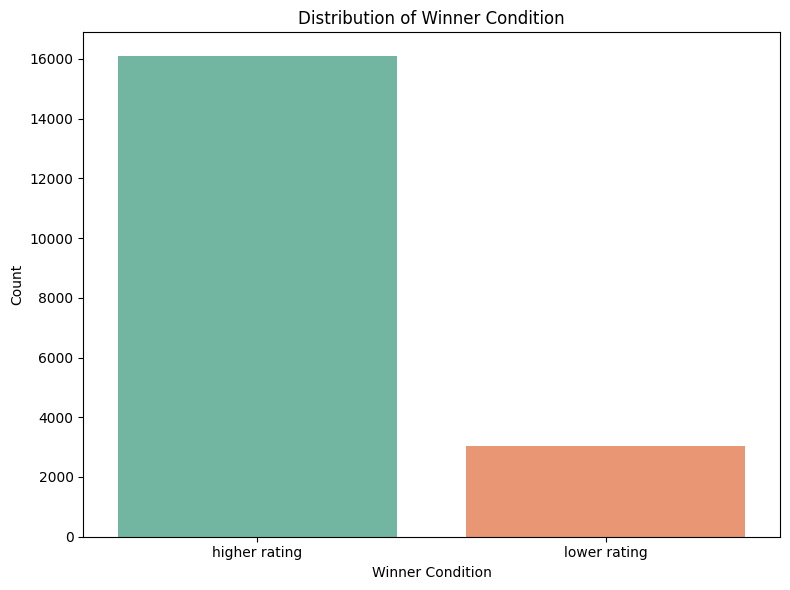

In [224]:
plt.figure(figsize=(8, 6))
sns.countplot(x='winner condition', data=raw_df, palette='Set2')

# Add labels and title
plt.title('Distribution of Winner Condition')
plt.xlabel('Winner Condition')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

Trong bước này, chúng ta sẽ tách cột **increment_code** thành hai cột **base_time** và **increment_time**.

In [225]:
raw_df[['base_time', 'increment_time']] = raw_df['increment_code'].str.split('+', expand=True)

# Converting the new columns to integer type
raw_df['base_time'] = raw_df['base_time'].astype(int)
raw_df['increment_time'] = raw_df['increment_time'].astype(int)

raw_df = raw_df.drop(columns=['increment_code'])

Cuối cùng, chúng ta đã lưu DataFrame mới vào file mới

In [226]:
raw_df.to_csv('clean_lichess_games.csv', encoding='utf-8')